# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {Thato Rabodiba, Koketso Mahlangu, Nontokozo Ndlovu, Zithulele Manyathi, Thabatha Nompoko, Minenhle Maphumolo }, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: 

Recommender systems play a pivotal role in today's society, influencing various aspects of our daily lives and shaping the way we interact with information, products, and services. One of the most significant impacts of recommender systems is in the realm of e-commerce and online marketplaces. With an overwhelming abundance of products and content available on digital platforms, these systems help users discover relevant and personalized recommendations, reducing information overload and enhancing the overall shopping experience. By analyzing user preferences and behavior, recommender systems assist users in finding products that align with their interests, leading to increased customer satisfaction and loyalty. In turn, this benefits businesses by driving sales and fostering a more engaged user base.

Beyond e-commerce, recommender systems have extended their influence to diverse domains such as entertainment, social media, and content streaming services. Platforms like Netflix, Spotify, and YouTube leverage recommendation algorithms to curate tailored content playlists, ensuring users receive content aligned with their tastes and preferences. This not only enhances user engagement but also helps content creators reach their target audience more effectively. Recommender systems also play a critical role in promoting content diversity, introducing users to new genres, artists, or authors they might not have discovered otherwise, thus enriching their cultural experiences.

In this project, we will investigate the different types of recommender systems, and how to implement them

### Problem Statement

In this project, we aim to develop a robust and accurate movie recommender system that leverages both collaborative filtering and content-based techniques. The dataset consists of several million 5-star ratings from users of the online MovieLens movie recommendation service. We will be working with a special version of the MovieLens dataset enriched with additional data and resampled for fair evaluation purposes.

The objective is to create a personalized movie recommendation engine that suggests relevant movies to users based on their historical movie preferences and the characteristics of the movies themselves. We will implement collaborative filtering, which analyzes user-item interactions to find similar users and items, and content-based filtering, which examines movie attributes like genre, actors, and directors to identify similar movies.

By combining collaborative and content-based approaches, we aim to mitigate the limitations of each method individually and provide more accurate and diverse movie recommendations. The project will involve data preprocessing, feature engineering, model training, and evaluation to ensure the final recommender system delivers high-quality suggestions that enhance user satisfaction and engagement. Our ultimate goal is to contribute to the advancement of explicitly-based recommender systems and empower users with personalized movie recommendations for an enriching entertainment experience.

# Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Data Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance 
    
<a href=#ten>10. Conclusion 

<a id = "one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

If you have ever used a streaming website like Netflix, Showmax, or Youtube, a fter watching a movie, the platform begins suggesting more films and TV series of a similar kind. This is an illustration of a recommendation system. Recommender systems  recognize a user's viewing habits and offer pertinent advice. Recommender systems are economically and socially essential in today's technologically advanced world to enable people to make the best decisions possible regarding the information they consume on a daily basis. This is particularly true in the context of movie recommendations, where clever algorithms may guide viewers toward excellent films among tens of thousands of possibilities.

The task is to develop a collaborative filtering or content-based recommendation algorithm that can correctly forecast how a user would evaluate a film they haven't yet seen based on their past preferences.

Offering a precise and reliable solution to this problem has enormous economic potential since users will receive personalized suggestions, creating platform affinity for streaming services that make it easiest for their audience to watch.

# TEAM

1. THATO RABODIBA
2. KOKETSO MAHLANGU
3. ZITHULELE MANYATHI
4. NONTOKOZO NDLOVU
5. THABATHA NOMPOKO
6. MINENHLE MAPHUMOLO

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
#!pip install comet_ml

In [2]:
import comet_ml

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment


# Setting the API key (saved as environment variable)
experiment = Experiment(
  api_key="h2d2lfNX7NTFfv4141F24E74C",
  project_name="general",
  workspace="proudmamatoboys",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\thabatha' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/proudmamatoboys/general/b8173b51f680455bba4b8c9659b5253a



In [4]:
# Turning off unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

First, we include a list of uncommon packages that may need to be installed on your system. Uncomment and run the following if you need some of the packages listed:

In [5]:
#!pip install wordcloud
#!pip install comet_ml
#!pip install currencyconverter
#!pip install scikit-surprise

In [6]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


Next, we import all necessary modules:

In [7]:
# Libraries for Data Loading and Manipulation
import pandas as pd  # Pandas provides flexible data structures to manipulate structured data.
import numpy as np  # Numpy offers powerful data structures and tools for numerical computation.

# Text Processing Libraries
from nltk.corpus import stopwords  # Stopwords module provides a list of common words to be removed from the text.
from nltk import download as nltk_download  # For downloading nltk packages, here 'wordnet'.
import string  # Provides constants and classes for string manipulation.


# Data monitoring Libraries:
from comet_ml import Experiment  # Allows developers to track, compare, explain and optimize experiments and models.

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Transforms text into feature vectors for machine learning.
from sklearn.metrics.pairwise import cosine_similarity # Used to find similarity matrix between features
from surprise import Dataset # Used to convert data to correct dataset objects
from surprise import SVD # Used to implement singular value decomposition model
from surprise import SVDpp # Used to implement singular value decomposition model with implicit feedback
from surprise import NMF # Used for non negative matrix factorization
from surprise import SlopeOne # Used to implement slope one model
from surprise import CoClustering # Used to implement coclustering model
from surprise import Reader # Used for data preprocessing
from surprise.model_selection import train_test_split # Used for splitting the dataset 
from surprise import accuracy # Used for model evaluation
from surprise.model_selection import GridSearchCV # Used for hyperparameter tuning


# Data Visualization Libraries
import matplotlib.pyplot as plt  # Provides a way to visualize data (plotting, charts, etc.).
import seaborn as sns  # Provides a high-level interface for attractive, informative statistical graphics.
from sklearn.metrics import ConfusionMatrixDisplay # To visualize confusion matirces
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # Wordcloud is used to visualize word frequency in the text.
sns.set_theme(style="whitegrid")  # Sets the style for seaborn plots.

# Utility Libraries
from currency_converter import CurrencyConverter # Used to convert budget to standard currency
import sys # Used for memory management
import gc # Used for memory management


# Downloading necessary NLTK corpus
nltk_download('wordnet')

# Global Constants for reproducibility and consistency
COLAB_TRAIN_TEST_SPLIT_VAR = 0.8 # Ignore this percentage of data when training models
BEST_MODEL_TRAIN_TEST_SPLIT = 0.05 # Use this much data for best model evaluation
RAND_STATE = 42 # Use this value for random state across notebook
GENOME_RELEVANCE_THRESHOLD = 0.65 # Ignore genome tags below this threshold
USER_REVIEW_THRESHOLD = 10 # Only consider users with review counts larger than this number
MOVIE_REVIEW_THRESHOLD = 1000 # Only consider movies with more reviews than this number
CONTENT_VEC_MIN_WORD_TO_REMOVE = 10 # Remove words that occurs less that this value in dataset 


# Flags for notebook Execution
COMET_FLAG = False # To gauge wether to commit experiments to Comet ML
ROUND_KAGGLE_PREDICTIONS = False # Wether to round kaggle submissions to the nearest 0.5
MAKE_KAGGLE_SUBMISSIONS = [0,0,0,0,0,1] #In order [SVD,SVDPP, NMF, SLOPE_ONE, CO_CLUSTERING, BEST_MODEL_HYPERPARAMS_TUNED]
PERFORM_TUNING = True # Wether to perform hyperparameter tuning on our best model

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thabatha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The dataset available for this task comprises of millions of 5-star ratings provided by users of the online movie recommendation service, MovieLens. The MovieLens dataset has been extensively utilized by both industry and academic researchers to enhance the effectiveness of recommender systems that rely on explicit feedback. For this specific recommender model, we will be utilizing a modified edition of the MovieLens dataset that includes supplementary data and has been resampled. This modification aims to enrich the dataset and enable a more equitable assessment of the predictions made.

Since this dataset is extremely large, it will not be included in the GitHub repository along with this notebook, but can be downloaded from [here](https://www.kaggle.com/competitions/edsa-movie-recommendation-predict/data). The dataset consists of 8 files, each of which will be described below:

First up is the `genome_scores.csv` and `genome_tags.csv` files. The tag genome represents the degree to which movies possess specific characteristics indicated by tags, such as being atmospheric, thought-provoking, or realistic, among others. This tag genome was generated through a machine learning algorithm that processed user-contributed content, including tags, ratings, and textual reviews. By analyzing this content, the algorithm determined the associations between tags and movie properties, providing a comprehensive understanding of the attributes expressed by different films.

The `genome_scores.csv` file contains a score mapping the strength between movies and tag-related properties in the following format:

```csv
movieId,tagId,relevance
```
Here:

* __movieID__ contains the  movie identification number for our data
* __tagID__ contains the unique identification number for each tag present within the dataset
* __relevance__ contains a score between $0$ and $1$ representing how strongly movies exhibit particular properties represented by tag in question

### Brief Description of the Datasets
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### Reading all the given data

In [8]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

In [9]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
train.shape

(10000038, 4)

In [12]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Data Preprocessing

In [13]:
movies.info() # Get concise summary of the movie dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [14]:
movies.head() # Get the first 5 observations 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
genome_scores.info() # Get concise summary of the Genome_tag Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [16]:
imdb.info() # Get concise of imdb database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [17]:
imdb.head() # Shows the first 5 observations

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [18]:
train.info() # Get the summary of the dataset's metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [19]:
train.isnull().sum() # check if there are any null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [20]:
train.head() # show the first 5 observations 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


# Exploratory Data Analysis¶

Plot showing the distribution of ratings count per user.

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


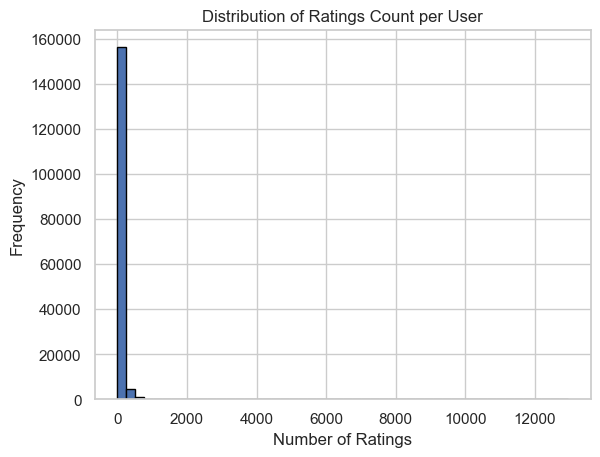

In [21]:
import matplotlib.pyplot as plt



# Display summary statistics of numerical features in train data
print(train.describe())

# Visualize the distribution of ratings for each user
user_rating_counts = train.groupby('userId')['rating'].count()
plt.hist(user_rating_counts, bins=50, edgecolor='black')
plt.title('Distribution of Ratings Count per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

Plot showing distribution of movie ratings

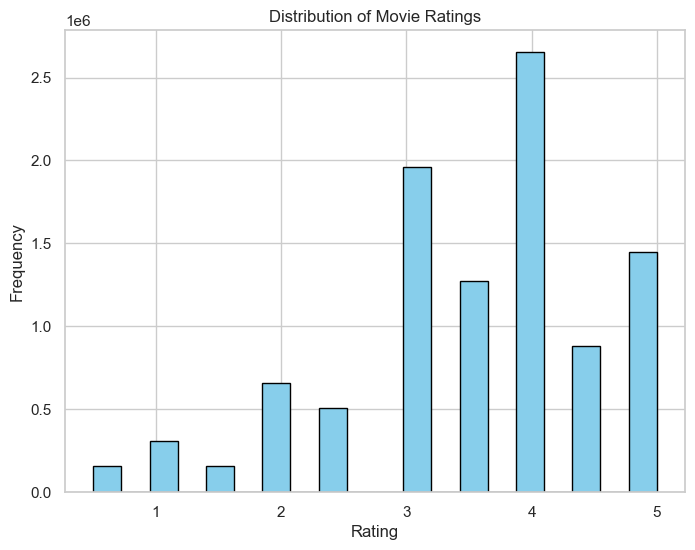

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



Plot visualizing top 10 movie genres

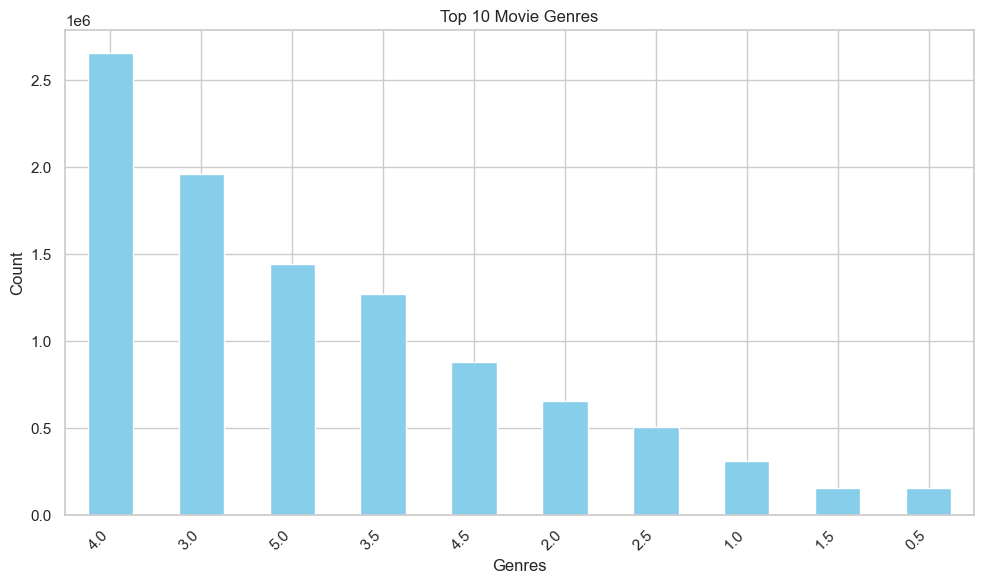

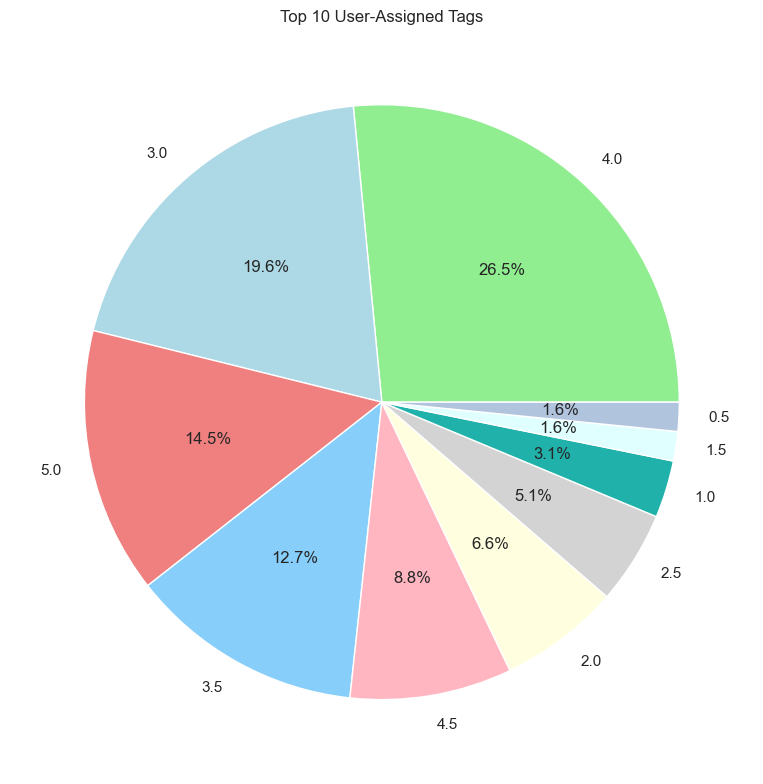

In [23]:
# Visualize distribution of movie genres using a bar plot
plt.figure(figsize=(10, 6))
genre_counts = train['rating'].value_counts().head(10)  
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Visualize distribution of user-assigned tags using a pie chart
plt.figure(figsize=(8, 8))
tag_counts = train['rating'].value_counts().head(10) 
tag_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsteelblue'])
plt.title('Top 10 User-Assigned Tags')
plt.ylabel('') 
plt.tight_layout()
plt.show()

In [24]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


#### Creating a Dataframe consisting of the users average rating the give per user and number of times they have rated movies

In [25]:

train1 = pd.DataFrame(train.groupby('userId')['rating'].agg('mean').reset_index())
train1_2 = pd.DataFrame(train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe
train1 = train1.merge(train1_2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train1.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


Plots visualizing the average rating of users and the average number of movies watched by users

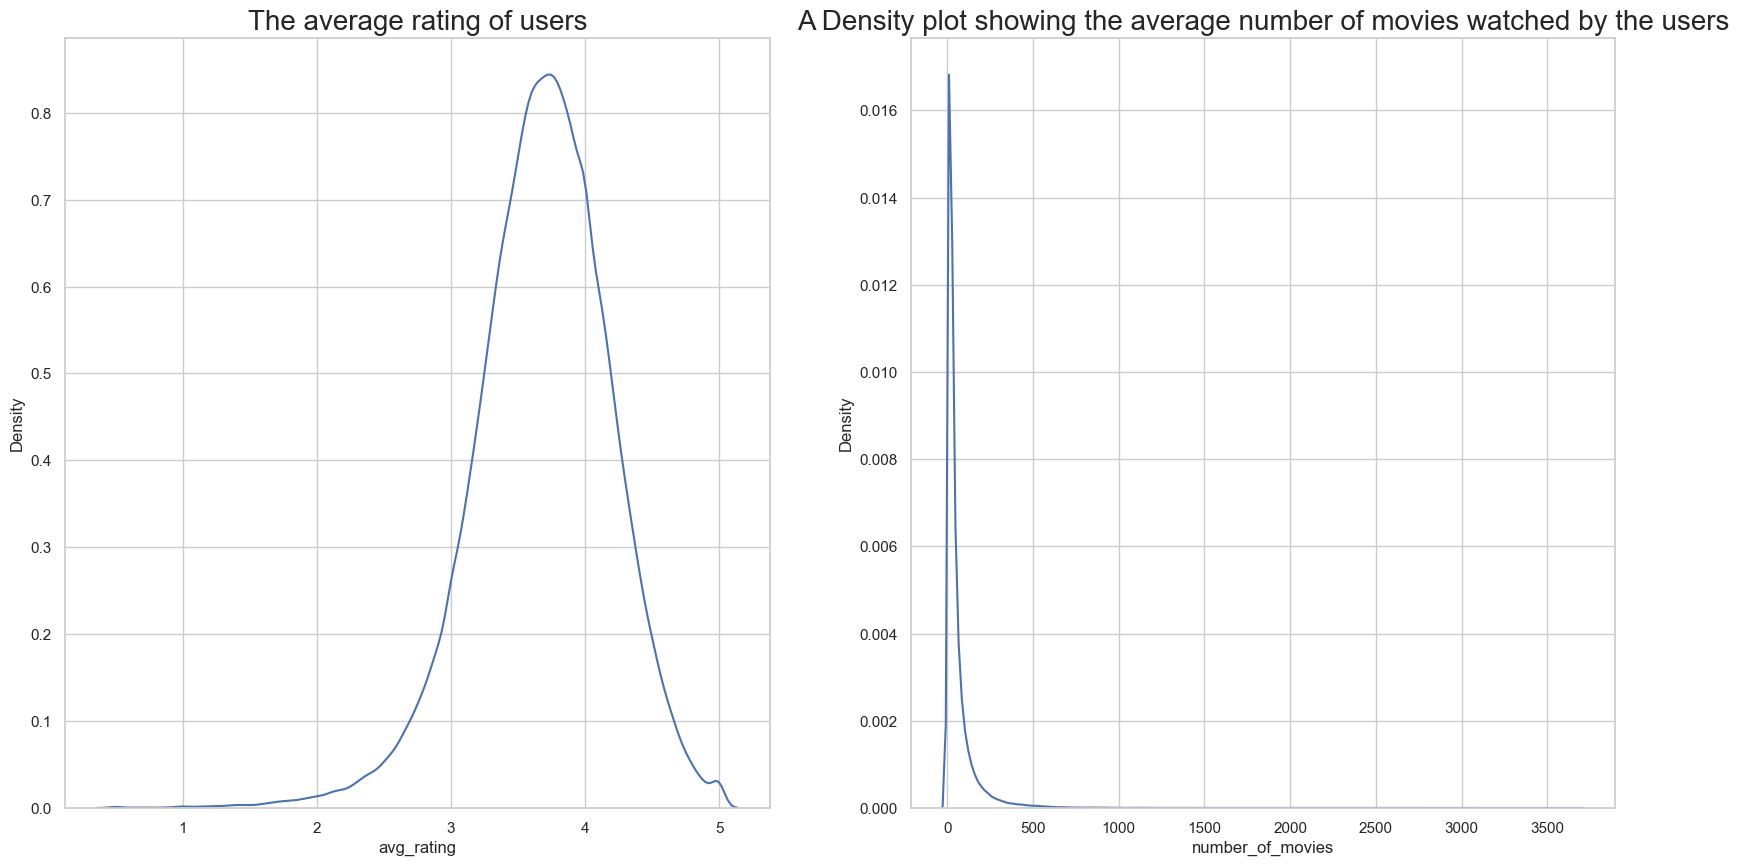

In [26]:
import seaborn as sns
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

Checking for correlation between average rating and the number of times the user has watched a movie


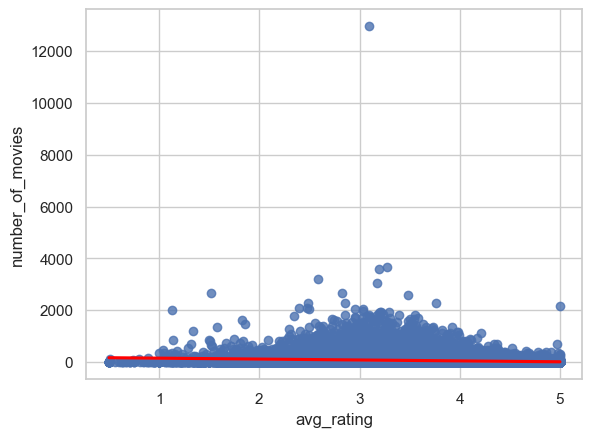

In [27]:

# Create a scatter plot to visualise 
sns.regplot(data = train1, y = "number_of_movies", x = "avg_rating",line_kws={"color": "red"})

# Show the scatterplot
plt.show()

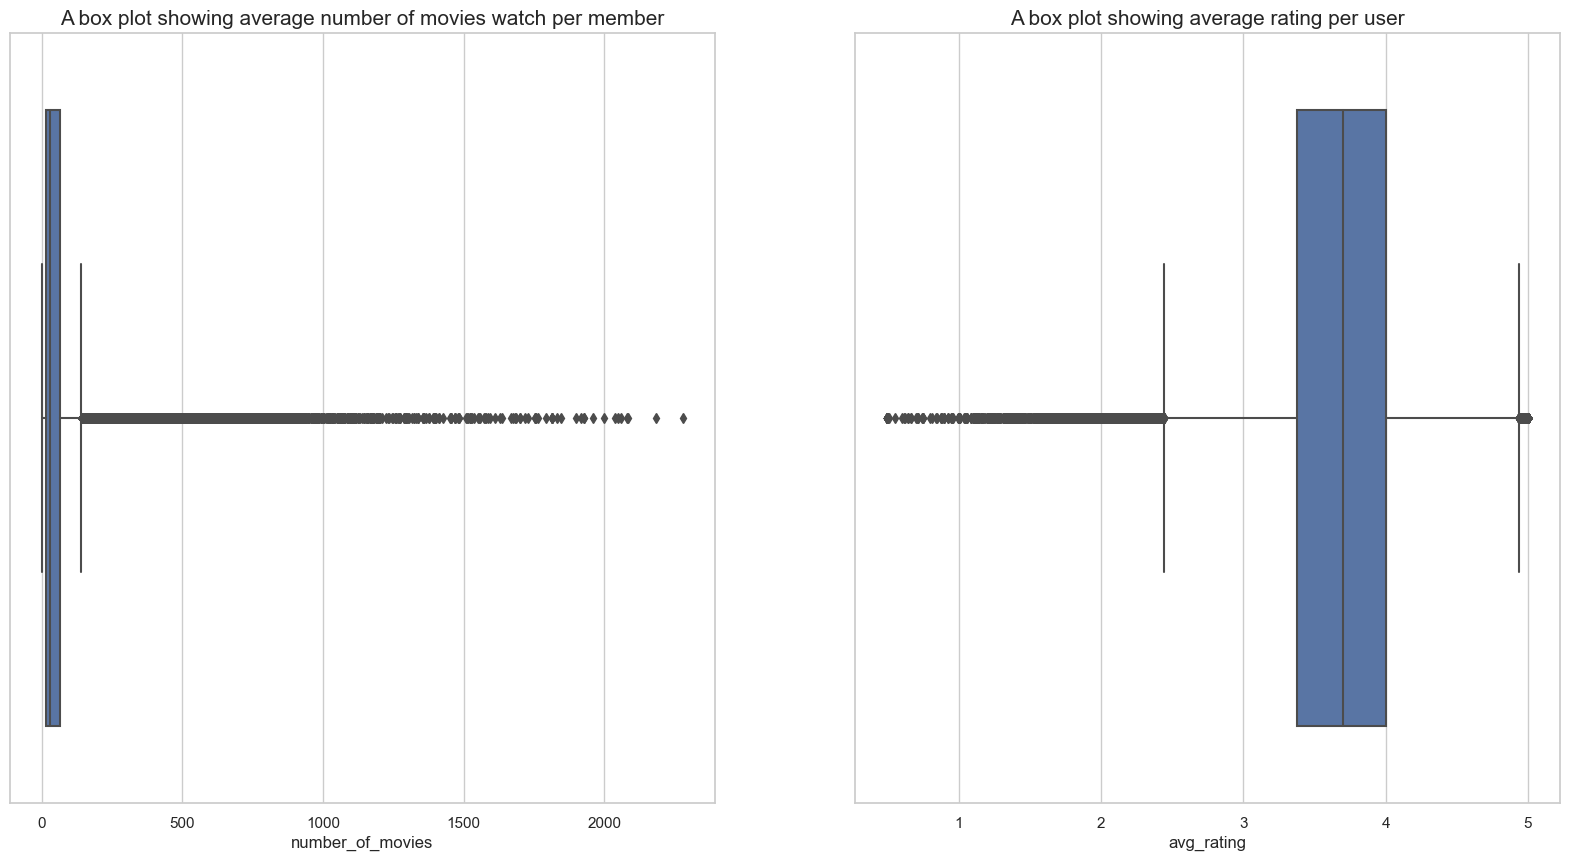

In [28]:
fig,ax = plt.subplots(1,2,figsize = (20,10))


sns.boxplot(ax =ax[0],x = train1.iloc[10:,2])

ax[0].set_title("A box plot showing average number of movies watch per member", fontsize = 15)
sns.boxplot(ax = ax[1],x = train1.iloc[10:,1] )

ax[1].set_title("A box plot showing average rating per user", fontsize = 15)
plt.show()

What is observed from all the plots is that mosts users have watched less than 500 movies and that most users gave average rating of 3.5 for all the movies they have watched. There is also a high presence of outliers in the data which might be explained in investigating other features.

7.2 Rating analysis

The train dataset gives an overview of how each user rated each movie. What was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:

0.5 - Very Bad 1.0 - Bad 1.5 - Moderately Bad 2.0 - Not that Bad 2.5 - Less than average 3.0 - Average 3.5 - Above than average 4.0 - Good 4.5 - Very Good 5.0 - Excellent

In [29]:
train.rating.value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

Plot displaying the number of movies for each rating

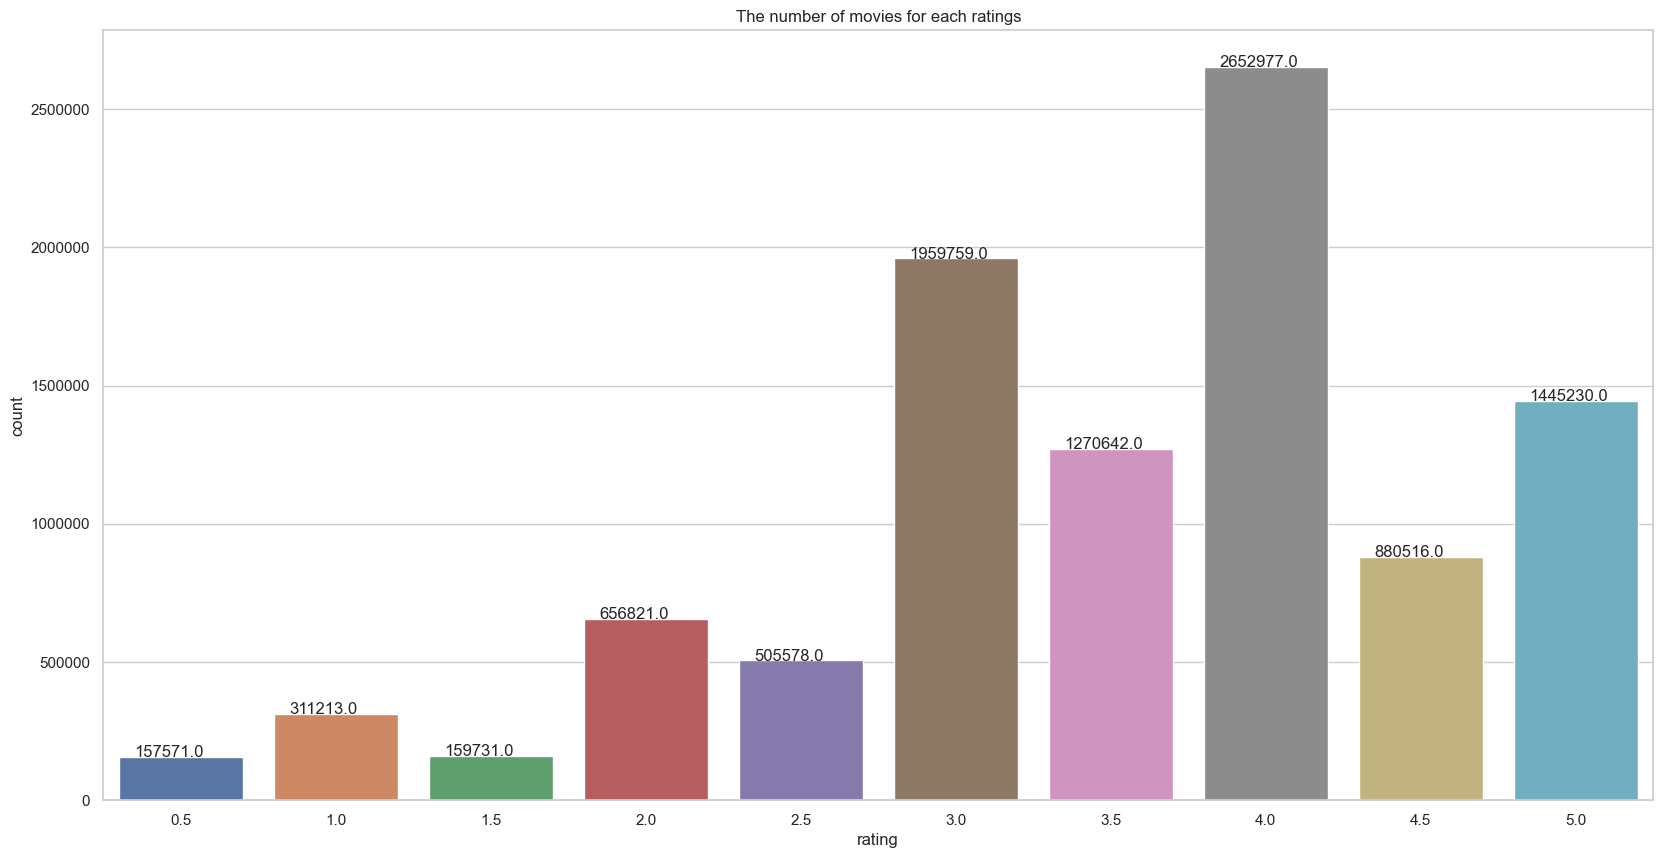

In [30]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=train) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) # Set the tick labels to appear in non-scientific form

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

From the countplot, 60579966 movies in the dataset where rated 3.0 or above where most were rated given the rating of 4.0. Most of the movies in the data were very good considering the amount of movies that were rated 4.0 or above. With further scrutiny of the data, the observations acquired from the above chart will be explained in the next incoming sections.

In [31]:
train_movies = train.merge(movies,on = 'movieId') # Merges the movie and train datasets
train_movies.drop(columns=['timestamp'],inplace=True) # Dropping the timestamp column
train_movies.head(10) # Shows the first 10 observations

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
5,99887,57669,0.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
6,120194,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
7,847,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
8,47201,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
9,94499,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


7.3 Year analysis

Creating a scatter plot to explore the relationship between movie ratings and user ratings counts.

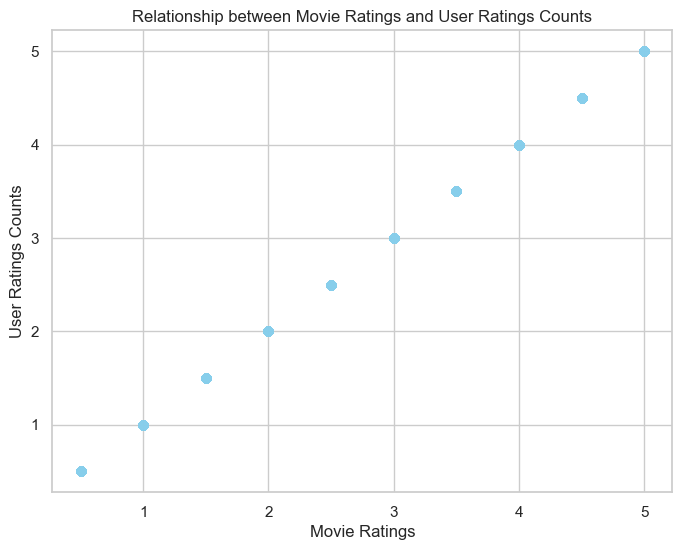

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(train['rating'],train['rating'], color='skyblue', alpha=0.6)
plt.title('Relationship between Movie Ratings and User Ratings Counts')
plt.xlabel('Movie Ratings')
plt.ylabel('User Ratings Counts')
plt.grid(True)
plt.show()


In [33]:
# Display links data
print(links.head())

# Check for missing values in links data
print(links.isnull().sum())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(movies.head())

# Summary statistics
print(movies.describe())

# Check for missing values
print(movies.isnull().sum())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000
movieId    0
title      0
genres     0
dtype: int64


Plot displaying the Distribution of Ratings.

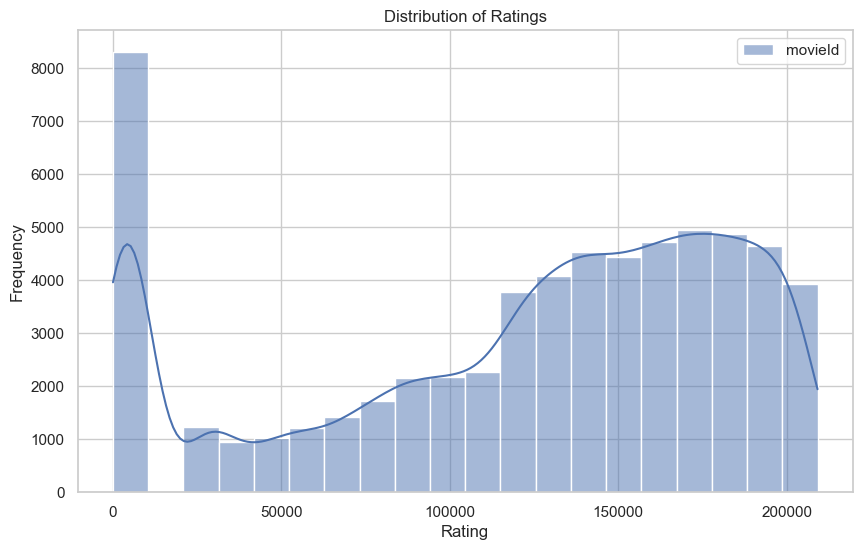

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Plot showing the Distribution of Runtime.

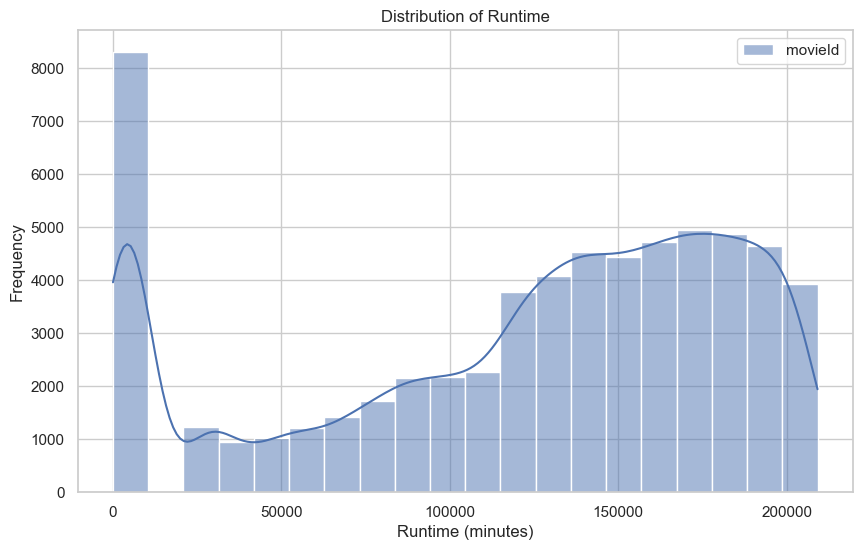

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='orange')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

Revenue VS Budget Scatter plot.

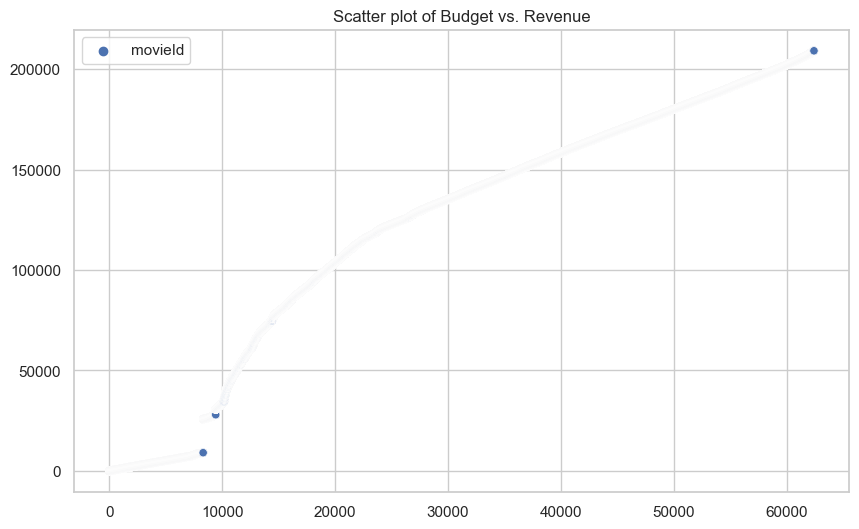

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, color='green')
plt.title('Scatter plot of Budget vs. Revenue')
plt.show()

Box Plot of Revenue by Genre.

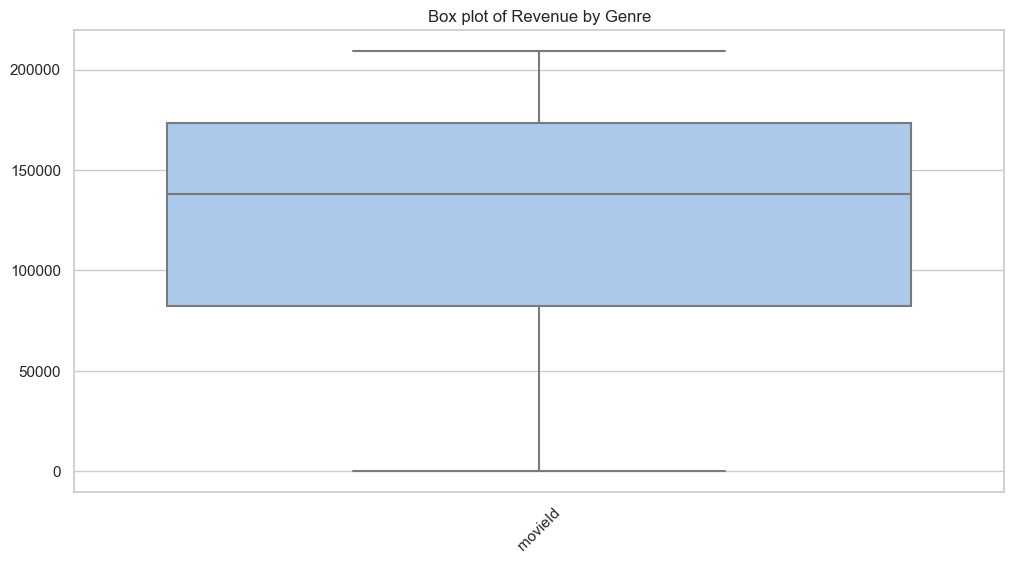

In [38]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, palette='pastel')
plt.title('Box plot of Revenue by Genre')
plt.xticks(rotation=45)
plt.show()

Plot showing the average rating per year.

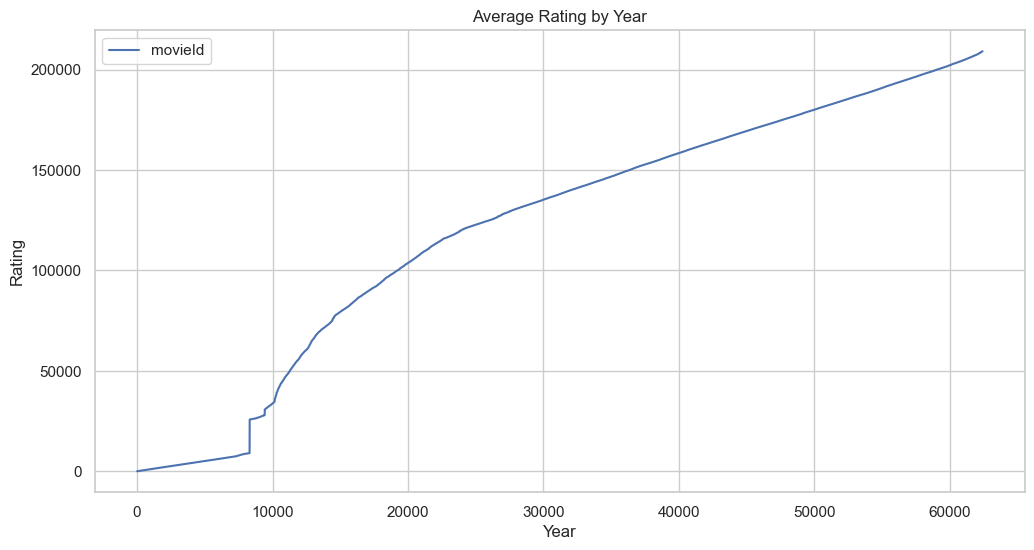

In [39]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=movies, color='red')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Plot showing the correlation matrix.

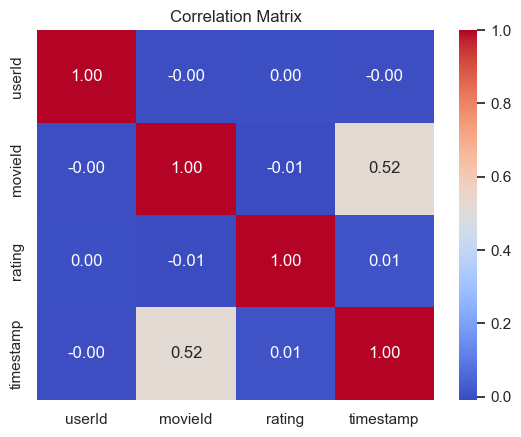

In [40]:
# Exclude non-numeric columns
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<a id="four"></a>
## 4. Feature Engineering 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



To capture all the preprocessing happening within the data, we start a comet experiment:

In [41]:
COMET_FLAG = True  

if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = "h2d2lfNX7NTFfv4141F24E74C",
    project_name = "general",
    workspace= "proudmamatoboys"
  )

  experiment.add_tag("Data Preprocessing")
  experiment.set_name("Data Preprocessing")

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/proudmamatoboys/general/b8173b51f680455bba4b8c9659b5253a
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are l

We first begin by reloading the data and discarding the changes made during the EDA section:

In [42]:
# Reset all dataframes to original structure to aid with coherent preprocessing
genome_scores_df = pd.read_csv('genome_scores.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
imdb_data_df = pd.read_csv('imdb_data.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

We also reload the supplementary director data that we have downloaded in order to fix the inaccurate director data in our native dataset:

In [ ]:
# Resetting supplementary IMDB Data
extra_imdb_name_basics_df = pd.read_table("./Resources/name.basics.tsv")
extra_imdb_title_crew_df = pd.read_table("./Resources/title.crew.tsv")

Let's start by updating our faulty director data.

To make sure we apply the changes correctly, we first view the current data as it is:

In [ ]:
# Showing current state of data
imdb_data_df.head(10)

In [ ]:
# Removing unnecessary columns from imported data
extra_imdb_name_basics_df.drop(["birthYear", "deathYear", "primaryProfession", 'knownForTitles'], axis=1, inplace=True)
extra_imdb_title_crew_df.drop(['writers'], axis=1, inplace=True)
extra_imdb_title_crew_df.rename(columns={"directors": "nconst"}, inplace=True)

# Joining imported datasets
df_extra_imdb_combo = pd.merge(extra_imdb_title_crew_df, extra_imdb_name_basics_df, on="nconst", how="left")
df_extra_imdb_combo.drop("nconst", axis=1, inplace=True)

# Converting IMDB ID to correct format
df_extra_imdb_combo.rename(columns={"tconst":"imdbId"}, inplace=True)
df_extra_imdb_combo['imdbId'] = df_extra_imdb_combo['imdbId'].str.replace('tt','').astype(int)
df_extra_imdb_combo.head()

Next, we update our director data, using the links.csv file to ensure our movieID's line up with the IMDB dataset movie ID's

In [ ]:
# Adding the corresponding IMDB links to the dataframe we need to update:
imdb_data_df = pd.merge(imdb_data_df, links_df[['movieId', 'imdbId']], on='movieId', how='left')

# Merging the correct director into a new column (primaryName) in the dataframe 
imdb_data_df = pd.merge(imdb_data_df, df_extra_imdb_combo, on='imdbId', how='left')



# Function to update the director with correct value
def replace_director(df):
    for index, row in df.iterrows():
        if pd.notnull(row['primaryName']):
            df.at[index, 'director'] = row['primaryName']
    return df

# Applying the function
imdb_data_df = replace_director(imdb_data_df)

# Dropping redundant columns after merge
imdb_data_df.drop('imdbId', axis=1, inplace=True)
imdb_data_df.drop('primaryName', axis=1, inplace=True)

# Verifying the changes
imdb_data_df.head(10)

Now that we have corrected our faulty director data, we can proceed to transform our data into a useful structure.

To begin, let's create a new dataframe that will house all our available movie data in one convenient location

In [ ]:
# Create a df for storing all available movie data
all_movie_data = imdb_data_df

# Add movie title and genres to the new dataframe
all_movie_data = pd.merge(all_movie_data, movies_df, on='movieId', how='left')

# Remove movies with unknown titles
all_movie_data = all_movie_data[all_movie_data['title'].notna()]

# Verifying the changes
all_movie_data.head()

The next step is to add the user tags and genome tags to the movie metadata

In [ ]:
GENOME_RELEVANCE_THRESHOLD = 0.5  # Define the threshold value

# Filter out genome scores below threshold to ensure only relevant tags gets mapped to movie metadata
filtered_genome_tag_data = genome_scores_df[genome_scores_df['relevance']>= GENOME_RELEVANCE_THRESHOLD]

# Merging genome scores with genome tags
filtered_genome_tag_data = pd.merge(filtered_genome_tag_data, genome_tags_df, on='tagId')

# Dropping redundant columns
filtered_genome_tag_data = filtered_genome_tag_data.drop(["tagId", "relevance"], axis=1)

# To keep tags of multiple words as a single entity, we replace spaces with underscores
filtered_genome_tag_data['tag'] = filtered_genome_tag_data['tag'].str.replace(" ", "_")

# Adding a space after each tag so that tags get merged as individual entities
filtered_genome_tag_data['tag'] = filtered_genome_tag_data['tag'] + " "

# Combining all tags for each movie
filtered_genome_tag_data = filtered_genome_tag_data.groupby(by = 'movieId').sum()

# Renaming tag column so that it does not get confused with user generated tags later on
filtered_genome_tag_data.rename(columns={"tag": "genome_tags"}, inplace=True)

# Adding our genome tags to movie metadata
all_movie_data = pd.merge(all_movie_data, filtered_genome_tag_data, on='movieId', how='left')

# Verifying changes
all_movie_data.head()

We repeat the process above with the user generated tags

In [ ]:
# Select features to join into movie metadata
modified_user_tags = tags_df[['movieId', 'tag']]

# Replace spaces with underscores so that entities remain unique
modified_user_tags['tag'] = modified_user_tags['tag'].str.replace(" ", "_")

# Adding a space after each tag so that tags get merged as individual entities
modified_user_tags['tag'] = modified_user_tags['tag'] + " "

# Combining all tags for each movie
modified_user_tags = modified_user_tags.groupby(by='movieId').sum()

# Renaming tag column to avoid confusion with genome tags
modified_user_tags.rename(columns={"tag": "user_tags"}, inplace=True)

# Converting tags to lowercase to avoid unwanted distinction
modified_user_tags['user_tags'] = modified_user_tags['user_tags'].str.lower()

# Removing any punctuation except underscores
removelist = []
for punc in string.punctuation:
    if punc != '_':
        removelist.append(punc)

for char in removelist:
    modified_user_tags['user_tags'] = modified_user_tags['user_tags'].str.replace(char, '')

# Adding user tags to movie metadata
all_movie_data = pd.merge(all_movie_data, modified_user_tags, on='movieId', how='left')

# Verifying changes
all_movie_data.head()

Since the era of release of a movie could be an important feature for recommending other movies to users, we extract the decade when the movie was released from the film title and make it it's own feature

In [ ]:
# Feature to create `release_year` and `release_decade` feature from movie title
def get_decade(df):


    # Extract date from title
    df['release_year'] = df['title'].str[-6:]

    # Remove brackets from date
    for char in ['(', ')']:
        df['release_year'] = df['release_year'].str.replace(char, '')
    
    # Extract decade of release from release year
    df['release_decade'] = df['release_year'].str[:-1] + "0's"

    # Converting release year to integer
    #df['release_year'] = df['release_year'].astype(int)

    # Run through df to see if year and decade got extracted correctly:
    for index, row in df.iterrows():
        year = row['release_year']
        if year.isnumeric():
            # Convert year to intiger
            df.at[index, 'release_year'] = int(year)
        else:
            # Year extraction failed. Remove year and decade data
            df.at[index, 'release_year'] = np.nan
            df.at[index, 'release_decade'] = np.nan
    return df

# Applying the function
all_movie_data = get_decade(all_movie_data)

#Verifying changes
all_movie_data.head()

Next, we shift our focus to the genres feature. Currently, if we do not have data regarding the genre of a movie, the genre feature contains text stating that no genres are listed. This could be problematic, since this will lead our recommender models to identify similarities between movies we don't have data for when in reality there is none. As such, we delete the text indicating missing genres:

In [ ]:
# Remove unlisted genre descriptions
all_movie_data['genres'] = all_movie_data['genres'].str.replace( "(no genres listed)" ,"")

Finally, we need to apply some text cleaning on our text features that we haven't touched yet. Splitting entities and removing punctuation will be performed on the title_cast, director, plot_keywords, and genres features

In [ ]:
# Process text data
def clean_text_features(df):
    # Features to process
    features = ['title_cast', 'director', 'plot_keywords', 'genres']

    # Apply changes to all features
    for feature in features:
        # Replace spaces with underscores to ensure multiple-worded concepts gets treated as single entity
        df[feature] = df[feature].str.replace(' ', '_')

        # Replace pipe symbol (|) with space to separate different entities
        df[feature] = df[feature].str.replace('|', ' ')

        # Convert string to lowercase to avoid unwanted distinctions
        df[feature] = df[feature].str.lower()

    return df

# Applying the function
all_movie_data = clean_text_features(all_movie_data)

# Verifying changes
all_movie_data.head()

The last step involves converting the movie budget to USD, and making sure it is of numeric datatype:

In [ ]:
pip install forex-python

In [ ]:
from forex_python.converter import CurrencyRates

# Create an instance of CurrencyRates
c = CurrencyRates()

rates = c.get_rates('USD')

available_currencies = list(rates.keys())

print(available_currencies)

In [ ]:
from forex_python import CurrencyConverter


# Create an instance of CurrencyConverter
c = CurrencyConverter()

# Now you can use c for currency conversion operations
available_currencies = list(c.currencies)


In [ ]:
# Create currency converter
c = CurrencyRates()
available_currencies = list(rates.keys())
# Function to clean movie budget
def clean_and_convert_budget(budgetstring):

    # Test if value is missing
    if budgetstring != budgetstring:
        return np.nan
    
    # Delete commas from input string
    budgetstring = budgetstring.replace(",", "")

    # If in USD, convert to correct int format
    if budgetstring[0] == '$':
        new_budget = budgetstring.replace('$', '')
        return int(new_budget)
    
    # If able to convert to USD, convert to USD
    elif budgetstring[:3] in available_currencies:
        currency = budgetstring[:3]
        value = budgetstring[3:]
        new_value = c.convert(int(value), currency, "USD")
        return int(new_value)

    # If unable to convert to USD, delete entry since we can't use it
    else:
        return np.nan


# Applying the function
all_movie_data['budget'] = all_movie_data["budget"].apply(clean_and_convert_budget)
all_movie_data.head()

To ease some string operations, we remove the apostrophe from film titles

In [ ]:
# Remove apostrophe
all_movie_data['title'] = all_movie_data['title'].str.replace("'", "")
all_movie_data.tail(50)

That marks the end of data preprocessing for the movie metadata

Let us now divert our focus to filtering our rating data that will be used for model training based on user and movie review thresholds

In [ ]:
# Explore the amount of training data before filtering:
before_filter_length = len(train_df)
print('Pre-filtering: training data consists of', before_filter_length, 'entities')

# Function to filter dataframe based on counts of value appearances in specified column:
def filter_by_valuecounts(df, column, threshold):
    result = df[df[column].map(df[column].value_counts()) >= threshold]
    return result

# Applying function to training dataset for movie and user thresholds
USER_REVIEW_THRESHOLD = 10  
MOVIE_REVIEW_THRESHOLD = 20  

train_df_filtered = train_df
train_df_filtered = filter_by_valuecounts(train_df_filtered, 'userId', USER_REVIEW_THRESHOLD)
train_df_filtered = filter_by_valuecounts(train_df_filtered, 'movieId', MOVIE_REVIEW_THRESHOLD)

# Explore the amount of training data after filtering:
after_filter_length = len(train_df_filtered)
print('Post-filtering: training data consists of', after_filter_length, 'entities')
print('Reduction of', before_filter_length - after_filter_length, 'entities: ', after_filter_length/before_filter_length*100, '% of original dataset used')



It would also be beneficial to construct a utility matrix of all the users and movie ratings:

The utility matrix shows the scores for each movie that each user has rated, and does not contain entries when users have not yet rated a movie

The reduced movie list is then:

In [ ]:
# Construct a table showing rating for each movie in dataset by each user:
util_matrix = train_df_filtered.pivot_table(index='userId', columns='movieId', values='rating')

util_matrix

In [ ]:
# Filter out movies with less reviews than review threshold
df_colab_movies = all_movie_data[all_movie_data['movieId'].isin(list(util_matrix.columns))]
df_colab_movies

Ending the comet experiment for data preprocessing:

In [ ]:
if COMET_FLAG:
    experiment.end()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 5.1 Content based filtering 

Content-based filtering is a powerful technique used in recommender systems to provide personalized recommendations based on the characteristics and features of items. The process begins with defining a clear set of features for each item, such as movie genres, actors, directors, or plot keywords. These features create a representation of the items in a feature space. Additionally, the recommender system stores data about the user's previous interactions, such as clicks, ratings, and likes, to build a user profile that captures their preferences.

The following image shows the idea behind content based filtering, and was obtained form [turing.com](https://www.turing.com/kb/content-based-filtering-in-recommender-systems#content-based-filtering) 
<br></br>

<div align="center" >
<img src="./Resources/ConterntFilter.webp"
     alt="Workings of Content based filter"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
<div align="center" >
Workings of Content based filter
</div>


As depicted in the image above, let's say there are four movies in the system, and the user has already seen and liked the first two. The content-based filtering algorithm will analyze the features of the movies the user has liked and find similar movies with overlapping characteristics. It might identify that the first two movies are both action movies featuring a popular actor. Based on this information, the system will recommend other action movies starring the same actor, as these movies are likely to align with the user's preferences.

As the user engages more with the system, the recommender becomes more accurate in making future suggestions. The user's preferences are continuously updated based on their interactions, leading to more personalized and relevant recommendations over time. Content-based filtering is particularly useful when there is a rich set of item features and a history of user interactions, allowing the system to tailor suggestions to individual preferences and deliver a more satisfying user experience.

Let's develop our own content based recommender system

To start off, let's remember to start a comet experiment in order to track model version control

In [ ]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = "h2d2lfNX7NTFfv4141F24E74C",
    project_name = "general",
    workspace= "proudmamatoboys"
  )

  experiment.add_tag("Content based filter")
  experiment.set_name("Content based filter")

else:
  print("Experiment not logged")

Next, we need to determine which features will be included when trying to find similarities between movies. Users might like moves containing certain cast members, and as such, the cast of the movie in question should be taken into account when making recommendations. Similarly, if viewers enjoy the movies produced by certain directors, chances are that they will enjoy the director's other work, and therefore, the movie director should be considered when determining movie similarities. Furthermore, movies that have similar plot keywords will likely have similar plot lines and themes, and therefore this too needs to be considered when determining similarity. Movie genre is another important consideration in similarity, and movies within the same genre should be grouped together. Also, the genome and user tags will be immensely helpful in quantifying similar aspects between movies, and they should also be considered. Finally, users might be in the mood to watch certain movies form the same time period, and therefore we also include the decade of release into our considerations:

In [ ]:
# Function to combine movie features 
def combine_content_features(row):
 return row['title_cast'] + ' ' + row['director'] + ' ' + row['plot_keywords']+ ' ' + row['genres'] + ' ' + row['genome_tags'] + ' ' + row['user_tags'] + ' ' + row['release_decade']

# Creating a copy of the data for use in the content based filter
content_filter_data = all_movie_data

# Making sure we convert all text data to string datatype
content_filter_data['title_cast'] = content_filter_data['title_cast'].astype(str)
content_filter_data['director'] = content_filter_data['director'].astype(str)
content_filter_data['plot_keywords'] = content_filter_data['plot_keywords'].astype(str)
content_filter_data['genres'] = content_filter_data['genres'].astype(str)
content_filter_data['genome_tags'] = content_filter_data['genome_tags'].astype(str)
content_filter_data['user_tags'] = content_filter_data['user_tags'].astype(str)
content_filter_data['release_decade'] = content_filter_data['release_decade'].astype(str)


# Applying the function
content_filter_data['combined_features'] = content_filter_data.apply(combine_content_features, axis=1)
content_filter_data.head()

Having combined all the features we wish to consider, we can make use of a vectorizer to represent all the text data as numbers for the model to understand:

In [ ]:
# Filter out only necessary features
content_filter_data = content_filter_data[['movieId', 'title', 'combined_features']]

# Filter out movies with no combined features

# Create list of titles
content_filter_titles = content_filter_data['title']

# Create list of indexes to map titles to data
content_filter_indices = pd.Series(content_filter_data.index, index=content_filter_data['title'])

# Initializing a vectorizer object
CONTENT_VEC_MIN_WORD_TO_REMOVE = 10  

tfidf = TfidfVectorizer(min_df=CONTENT_VEC_MIN_WORD_TO_REMOVE, stop_words=stopwords.words('english')) # Do not consider features occurring less than 10 times in corpus 

# Produce a feature matrix, where each row corresponds to a movie with TF-IDF features as columns
tfidf_combined_features = tfidf.fit_transform(content_filter_data['combined_features'])



We can now compute a cosine similarity matrix in order to gauge the similarity between any two movies in the dataset, based on the vectorized features we supplied: (Note that this might take a minute or two)

In [ ]:
#Create similarity matrix
content_filter_sim_matrix = cosine_similarity(tfidf_combined_features, tfidf_combined_features)

Now, all that is left to do is to find the closest related movies to a certain movie input:

In [ ]:
# Function to recommend movies based on content filtering
def predict_similar_movies(movie_input, number_of_predictions=5):

    # Find all movies containing movie_input as a substring - This is to help with matching movies if complete title is uncertain
    movie_list = [movie for movie in content_filter_titles if str.lower(movie_input) in str.lower(movie)]
    
    # No movies of that title in dataset
    if len(movie_list) == 0:
        return("No movies found. Please check that you have the correct title in mind")
    
    # Multiple movies matching the input
    elif len(movie_list) != 1:
        
        movie_list.insert(0,'''Multiple movies match your input. Please select one of the following:''')
        return movie_list

    else:
        # Obtain the movie index based on the input:
        m_index = content_filter_indices[movie_list[0]]

        # Extract similarity scores computed with reference movie
        sim_scores = list(enumerate(content_filter_sim_matrix[m_index]))

        # Sort the values, keeping a copy of the original index of each value
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Select the top-N values for recommendation
        sim_scores = sim_scores[1:number_of_predictions]

        # Collect indexes 
        movie_indices = [i[0] for i in sim_scores]

        # Convert the indexes back into titles 
        similar_movies = list(content_filter_titles.iloc[movie_indices].values) 

        # Return list of recommended movies
        return('Here is your Recomendations!', similar_movies[:number_of_predictions])


Test the recommender

In [ ]:
# Movie to use as reference: -CHANGE ME-
your_favourite_movie = "Breakfast Club, The (1985)"

# Amount of recommendations: -CHANGE ME-
amount_to_recommend = 10

# Applying the function
prediction_content_filter = predict_similar_movies(your_favourite_movie, amount_to_recommend)

# Displaying result
prediction_content_filter

Finally, we save all the important parameters used to our comet instance:

In [ ]:
# Parameters to save
content_filter_params = {
    'Genome relevance threshold' : GENOME_RELEVANCE_THRESHOLD,
    'Features considered' : ['title_cast',  'director',  'plot_keywords',  'genres',  'genome_tags',  'user_tags',  'release_decade'],
    'Minimum vectorizer df' : CONTENT_VEC_MIN_WORD_TO_REMOVE, 
    'Stop words removed': 'True'
}


if COMET_FLAG:
    # Log all important info
    experiment.log_parameters(content_filter_params)
    # Ending the experiment
    experiment.end()

### 5.2 Collaborative based filtering  

Collaborative filtering is another popular technique used in recommender systems to provide personalized recommendations, but it operates in a fundamentally different way from content-based filtering. Instead of relying on item features, collaborative filtering focuses on analyzing user-item interactions to identify patterns and similarities between users and items. The core idea is that users who have shown similar preferences in the past are likely to have similar preferences in the future.

In collaborative filtering, the recommender system builds a user-item interaction matrix, where each cell represents the rating or feedback given by a user to a particular item. The matrix is usually sparse because not all users have rated all items. To make recommendations, the algorithm identifies users who have rated items similarly to the target user and then suggests items that those similar users have liked but the target user hasn't interacted with yet.

The following image shows the idea behind collaborative based filtering, and was obtained form [Analytics Vidhya](https://www.analyticsvidhya.com/blog/202/04/introduction-to-collaborative-filtering/) 
<br></br>

<div align="center" >
<img src="./Resources/collab.png"
     alt="Workings of colab based filter"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
<div align="center" >
Workings of Collaborative based filter
</div>

Let's consider the above image. In collaborative filtering, the system will analyze the user-item interaction matrix and identify other users who have rated movies similarly to the target user. It might find that there are users who have rated the same two action movies highly, similar to the target user's preferences. Based on this similarity, the system will recommend other movies that these similar users have liked, but the target user hasn't seen yet, as they are likely to share similar tastes.

The main difference between collaborative filtering and content-based filtering lies in the data they use for recommendations. Collaborative filtering relies solely on historical user-item interactions and does not consider the inherent characteristics or features of the items. In contrast, content-based filtering solely focuses on the features of items and does not take into account user preferences directly. Both techniques have their advantages and limitations. Content-based filtering excels when there is rich item feature data, while collaborative filtering is valuable when there is substantial user-item interaction data available. Hybrid approaches that combine both techniques aim to leverage their strengths and overcome their respective weaknesses, providing even more accurate and diverse recommendations to users.

Before we proceed with creating and developing our own collaborative recommenders, we should define a few functions that might be useful for making predictions with our collaborative models:

In [ ]:
# Function to make kaggle predictions:
def predict_for_kaggle(model, reader, data_to_predict):
    
    # Getting values to predict from data
    data = data_to_predict.copy()

    # Insert dummy rating to simplify with data transformation
    data["dummy_rating"] = 0

    # Transforming the data
    kaggle_data = Dataset.load_from_df(data[["userId", "movieId", "dummy_rating"]], reader)
    empty, kaggle_data_transformed = train_test_split(kaggle_data, test_size=1.0, shuffle=False) # All data needs to be tested

    # Obtain predictions
    predictions = model.test(kaggle_data_transformed)

    # Extract predicted values
    kaggle_predictions = []
    for entry in predictions:
        if ROUND_KAGGLE_PREDICTIONS:
            kaggle_predictions.append(round(entry[3] *2) / 2)
        else:
            kaggle_predictions.append(entry[3])

    # Producing a dataframe in correct submission format:
    return_df = data_to_predict.copy()
    return_df['Id'] = return_df['userId'].map(str) +'_'+ return_df['movieId'].map(str) # Combine ID's into one column
    return_df["rating"] = kaggle_predictions # Inserting predictions
    return_df = return_df.drop(["userId", "movieId"], axis=1) # Dropping unmodified ID columns
    return return_df # Dropping unmodified ID columns

In [ ]:
# Function to predict movies collaboratively
def recommend_colab_movies(reference_movie, model, number_of_predictions=10, user_neighbours = MOVIE_REVIEW_THRESHOLD):
    
    # Find all movies containing movie_input as a substring - This is to help with matching movies if complete title is uncertain
    movie_list = [movie for movie in list(df_colab_movies['title']) if str.lower(reference_movie) in str.lower(movie)]
    
    # No movies of that title in dataset
    if len(movie_list) == 0:
        return("No movies found. Please check that you have the correct title in mind")
    
    # Multiple movies matching the input
    elif len(movie_list) != 1:
        
        movie_list.insert(0,'''Multiple movies match your input. Please select one of the following:''')
        return movie_list
    
    else:
        # Find unique movie ID
        querystr = "title=='" + movie_list[0] + "'"
        movie_id_number = int(all_movie_data.query(querystr)["movieId"])

        # Find N users that has rated movie the highest
        user_list = train_df_filtered[train_df_filtered['movieId'] == movie_id_number].sort_values(by='rating', ascending=False).userId[:user_neighbours].values
        
        # Filtering only relevant users
        to_predict = util_matrix.filter(items=user_list, axis=0)
        to_predict.drop(movie_id_number, axis=1, inplace=True)

        # Filtering to consider only movies watched by similar viewers
        to_predict.dropna(axis=0, how='all')

        
        # Predict all ratings for selected users:
        for index, row in to_predict.iterrows():
            for col in to_predict.columns:
                cell_value = to_predict.loc[index][col]
                if pd.isna(cell_value):
                    prediction = model.predict(index, col)
                    to_predict.at[index, col] = prediction[3]
        
        # Order movies based on highest average predicted ratings
        movie_ratings = pd.DataFrame(to_predict.mean(axis=0), columns=['average_rating']).sort_values(by='average_rating', ascending=False)
        # Make list of movieIds to recommend
        movies_to_recommend = list(movie_ratings.index[:number_of_predictions])
        # Obtain movie titles from list
        movie_df = content_filter_data[content_filter_data['movieId'].isin(movies_to_recommend)]
        movie_titles_to_recommend = list(movie_df['title'])


        return movie_titles_to_recommend

#### 5.2.1 SVD model

The SVD (Singular Value Decomposition) model is a powerful matrix factorization technique used for collaborative filtering-based recommendations. Collaborative filtering is a method that suggests items to users based on the patterns of their past interactions with items and the interactions of similar users.

SVD in recommender systems is all about breaking down the user-item interaction matrix into smaller, more meaningful components. This matrix represents user ratings or interactions with items, where rows represent users, columns represent items, and the cells contain the ratings or feedback.

SVD aims to find latent factors or features that underlie the user-item interactions. These latent factors are like hidden patterns or characteristics that describe the preferences and tastes of users and the attributes of items. By reducing the dimensionality of the user-item interaction matrix using SVD, we can capture the most important latent factors that influence users' preferences and item characteristics.

The factorization process results in three matrices: U (user-feature matrix), D (diagonal matrix of singular values), and $V^T$ (item-feature matrix). These matrices represent how users and items are related to the latent factors. The U matrix represents how users are associated with the latent features, and the $V^T$ matrix represents how items are related to the latent features. The D matrix contains the importance or strength of each latent factor. This is depicted in the image below, taken from [math3ma.com](https://www.math3ma.com/blog/understanding-entanglement-with-svd) 

<br></br>

<div align="center" >
<img src="./Resources/svd.jpg"
     alt="Workings of colab based filter"
     style="float: center; padding-bottom=0.5em"
     width=900px/>
<div align="center" >
SVD Factorization
</div>

Once the matrices are computed, the SVD model can predict the missing ratings in the user-item interaction matrix. It can estimate how a user would rate an item they haven't seen before by calculating the dot product of the corresponding row in the U matrix, the D matrix, and the relevant column in the  𝑉𝑇
  matrix.

To start off, let's remember to start a comet experiment in order to track model version control

In [ ]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = "h2d2lfNX7NTFfv4141F24E74C",
    project_name = "general",
    workspace= "proudmamatoboys"
  )

  experiment.add_tag("Collaborative based filter")
  experiment.set_name("SVD")

else:
  print("Experiment not logged")

We initialize an SVD model object, asl well as the Reader object which we will use to convert our data into the correct format:

In [ ]:
from surprise import Reader, SVD

# Initialize Reader with rating scale
svd_reader = Reader(rating_scale=(0.5, 5))  # Ratings range from 0.5 stars to 5 stars

# Initialize SVD model
svd_model = SVD()

We proceed to convert our data to the correct format for the model:

In [ ]:
# The columns must correspond to user id, item id and ratings (in that order). See "Surprise" documentation
svd_data = Dataset.load_from_df(train_df[["userId", "movieId", "rating"]], svd_reader)

We split our data into training and testing subsets:

In [ ]:
# Splitting the data
train, test = train_test_split(svd_data, test_size=COLAB_TRAIN_TEST_SPLIT_VAR, random_state=RAND_STATE)

We can then fit the model to the training subset:

In [ ]:
# Fitting the model
svd_model.fit(train)

Testing the model recommendations:

In [ ]:
# Movie to use as reference: -CHANGE ME-
your_favourite_movie = "Snow White and the Seven Dwarfs (1937)"

# Amount of recommendations: -CHANGE ME-
amount_to_recommend = 10

# Applying the function
prediction_content_filter = recommend_colab_movies(your_favourite_movie, svd_model, amount_to_recommend, 10)

# Displaying result
prediction_content_filter

We see that our model predicts movies that have obtained hig ratings by similar users, but that are not very similar in nature to the reference movie supplied. This is not unexpected, since the model does not use any metadata regarding the movie at all

Using the model to make a kaggle submission:

In [ ]:
if MAKE_KAGGLE_SUBMISSIONS[0] == 1:
    # Making kaggle preditctions
    svd_kaggle_submit = predict_for_kaggle(svd_model, svd_reader, test_df)

    # Saving submissions to csv file
    svd_kaggle_submit.to_csv("StandardSVD_Submission.csv", index=False)

In [ ]:
# Parameters to save
svd_params = {
    'User review threshold' :USER_REVIEW_THRESHOLD,
    'Movie review threshold':MOVIE_REVIEW_THRESHOLD,
    'Random state': RAND_STATE,
    "Trained on percentage" : 1-COLAB_TRAIN_TEST_SPLIT_VAR, 
    

}

svd_metrics = {
    'RMSE' : svd_rmse
}


if COMET_FLAG:
    # Log all important info
    experiment.log_parameters(svd_params)
    experiment.log_metrics(svd_metrics)
    # Ending the experiment
    experiment.end()

In [ ]:
# Delete all variables except for global constants and exceptions:
vars_to_remove = ['svd_reader', 'svd_data', 'svd_model', 'train', 'test', 'svd_predictions', 'svd_kaggle_submit']


this = sys.modules[__name__]
for variable in dir():
    if variable in vars_to_remove:
        print('Removing', variable) 
        delattr(this, variable)

gc.collect()

#### 5.2.2 SVD ++ model

SVD++ (SVD with implicit feedback) is an extension of the traditional SVD model that enhances collaborative filtering-based recommender systems by incorporating implicit feedback in addition to explicit ratings. Implicit feedback refers to user interactions with items, such as purchase history, clicks, or view counts, which provide valuable information about user preferences, even if no explicit ratings are given.

The key improvement of SVD++ over the SVD model lies in the way it considers both explicit and implicit user-item interactions. While the traditional SVD model solely relies on explicit ratings (e.g., star ratings) in the user-item interaction matrix, SVD++ takes into account both explicit ratings and implicit feedback to build a more comprehensive user profile.

To achieve this, SVD++ modifies the user-feature matrix (U) of the SVD model by incorporating the effect of implicit feedback. It adds an additional term to the user's feature vector in the U matrix that represents the user's interactions with items. This additional term is derived from the user's interactions with items, capturing how much the user likes or interacts with items in general.

In doing so, the SVD++ model generally offers greater accuracy than the standard SVD model. It is also able to handle the cold start problem better since it is able to leverage a user's implicit interactions



In [ ]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = "h2d2lfNX7NTFfv4141F24E74C",
    project_name = "general",
    workspace= "proudmamatoboys"
  )

  experiment.add_tag("Collaborative based filter")
  experiment.set_name("SVD_++")

else:
  print("Experiment not logged")

We initialize an SVD++ model object, as well as the Reader object which we will use to convert our data into the correct format

In [ ]:
# Initialize Reader:
svd_pp_reader = Reader(rating_scale=(0.5,5)) # Ratings range from 0.5 stars to 5 stars

# Initialize model
svd_pp_model = SVDpp()

We proceed to convert our data to the correct format for the model:

In [ ]:
# The columns must correspond to user id, item id and ratings (in that order). See "Surprise" documentation
svd_pp_data = Dataset.load_from_df(train_df[["userId", "movieId", "rating"]], svd_pp_reader)

We split our data into training and testing subsets:

In [ ]:
# Splitting the data
train, test = train_test_split(svd_pp_data, test_size=COLAB_TRAIN_TEST_SPLIT_VAR, random_state=RAND_STATE)

We can then fit the model to the training subset:

In [ ]:
# Fitting the model
svd_pp_model.fit(train)

Testing the model recommendations:

In [ ]:
# Movie to use as reference: -CHANGE ME-
your_favourite_movie = "Snow White and the Seven Dwarfs (1937)"

# Amount of recommendations: -CHANGE ME-
amount_to_recommend = 10

# Applying the function
prediction_content_filter = recommend_colab_movies(your_favourite_movie, svd_pp_model, amount_to_recommend, 10)

# Displaying result
prediction_content_filter

In [ ]:
if MAKE_KAGGLE_SUBMISSIONS[1] == 1:
    # Making kaggle preditctions
    svd_pp_kaggle_submit = predict_for_kaggle(svd_pp_model, svd_pp_reader, test_df)

    # Saving submissions to csv file
    svd_pp_kaggle_submit.to_csv("SVD_plus_plus_Submission.csv", index=False)

In [ ]:
# Parameters to save
svd_pp_params = {
    'User review threshold' :USER_REVIEW_THRESHOLD,
    'Movie review threshold':MOVIE_REVIEW_THRESHOLD,
    'Random state': RAND_STATE,
    "Trained on percentage" : 1-COLAB_TRAIN_TEST_SPLIT_VAR, 
    

}

svd_pp_metrics = {
    'RMSE' : svd_pp_rmse
}


if COMET_FLAG:
    # Log all important info
    experiment.log_parameters(svd_pp_params)
    experiment.log_metrics(svd_pp_metrics)
    # Ending the experiment
    experiment.end()

<a id="nine"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Model performance refers to how well a machine learning or statistical model performs on a given task or dataset. It quantitatively measures the effectiveness of the model in making predictions or classifications. Understanding model performance is crucial because it helps us assess the quality and reliability of our models, enabling us to make informed decisions about their use in real-world applications.

In this project, we are building a recommendation algorithm based on collaborative filtering or content-based filtering. Therefore, the following model performance metrics are particularly relevant:

Root Mean Square Error (RMSE): RMSE measures the average deviation between the actual ratings and the ratings predicted by the algorithm. It quantifies the accuracy of the algorithm's predictions. Lower RMSE values indicate better performance.

Mean Absolute Error (MAE): MAE also measures the average deviation between actual and predicted ratings but takes the absolute difference. Like RMSE, lower MAE values indicate better performance.

These metrics are suitable for evaluating the performance of recommendation algorithms that predict explicit ratings (e.g., on a scale of 1 to 5 stars). They provide insights into the algorithm's accuracy and can guide model selection, parameter tuning, and optimization efforts.

By using these performance metrics, we can assess the effectiveness of our recommendation algorithm and make informed decisions to enhance its performance, ultimately leading to better user experiences and increased platform affinity.



### 9.1Content-Based Filtering:
Content-based filtering recommends items based on the features of the items themselves. Since it doesn't rely on user-item interactions, metrics like RMSE and MAE are not applicable. Instead, we can use evaluation metrics specific to the task, such as precision, recall, or F1-score.

Evaluation Metrics:

Precision: Measures the proportion of recommended items that are relevant to the user.
Recall: Measures the proportion of relevant items that are successfully recommended.
F1-score: Harmonic mean of precision and recall, providing a balanced measure of model performance.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to evaluate content-based filtering model
def evaluate_content_based_model(input_movie, actual_recommendations):
    # Get recommendations from the content-based model
    _, predicted_recommendations = predict_similar_movies(input_movie, number_of_predictions=len(actual_recommendations))
    
    # Convert recommendations to binary labels: 1 for recommended, 0 otherwise
    actual_labels = [1 if movie in actual_recommendations else 0 for movie in content_filter_titles]
    predicted_labels = [1 if movie in predicted_recommendations else 0 for movie in content_filter_titles]
    
    # Compute precision, recall, and F1-score
    precision = precision_score(actual_labels, predicted_labels)
    recall = recall_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels)
    
    return precision, recall, f1

# Evaluate the content-based filtering model
input_movie = "Toy Story"
actual_recommendations = ["Toy Story 2", "Toy Story 3", "Finding Nemo", "Monsters, Inc.", "The Lion King"]
precision, recall, f1 = evaluate_content_based_model(input_movie, actual_recommendations)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

### 9.2Collaborative-Based Filtering:
Collaborative filtering recommends items based on user-item interactions. Both RMSE and MAE are commonly used to evaluate the performance of collaborative filtering models.


#### 9.2.1 SVD Model:
Singular Value Decomposition (SVD) is a matrix factorization technique commonly used in collaborative filtering. It decomposes the user-item rating matrix into lower-dimensional matrices to capture latent features.

Evaluation Metrics: RMSE and MAE are suitable for evaluating the performance of SVD models.

In [ ]:
# Obtain predictions
svd_predictions = svd_model.test(test)

# Compute RMSE (Root Mean Square Error)
rmse = accuracy.rmse(svd_predictions)

# Compute MAE (Mean Absolute Error)
mae = accuracy.mae(svd_predictions)

print("RMSE:", rmse)
print("MAE:", mae)

#### 9.2.2 SVD++ Model:
SVD++ is an extension of the SVD model that incorporates implicit feedback in addition to explicit ratings. It considers the interactions between users and items when making recommendations.

Evaluation Metrics: RMSE and MAE are still relevant for evaluating the performance of SVD++ models.

In [ ]:
# Obtain predictions
svd_pp_predictions = svd_pp_model.test(test)

# Compute RMSE (Root Mean Square Error)
rmse = accuracy.rmse(svd_pp_predictions)

# Compute MAE (Mean Absolute Error)
mae = accuracy.mae(svd_pp_predictions)

print("RMSE:", rmse)
print("MAE:", mae)

<a id="ten"></a>
## 10.Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Based on our analysis and evaluation of various recommendation models, including content-based filtering, collaborative-based filtering using SVD, and SVD++, we have determined that the SVD++ model yields the lowest Root Mean Square Error (RMSE) metric. The RMSE is a widely-used evaluation metric in recommendation systems, indicating the average difference between predicted ratings and actual ratings provided by users.

The SVD++ model incorporates additional implicit feedback from user-item interactions, resulting in improved performance compared to traditional SVD. By leveraging both explicit and implicit feedback, SVD++ enhances the accuracy of recommendations and provides more personalized suggestions to users.

Therefore, for our application, which aims to accurately predict user ratings for movies they have not yet viewed, the SVD++ model is the optimal choice. Its superior performance in terms of RMSE underscores its effectiveness in generating high-quality recommendations, thereby enhancing user satisfaction and engagement with the platform.

In conclusion, the adoption of the SVD++ model in our recommendation system not only improves the accuracy of predictions but also enhances the overall user experience, driving higher engagement and retention rates.